In [2]:
import os
import pandas as pd

dirProject = os.getcwd()

dirData    = os.path.join(dirProject, r"data")
dirDataUTA = os.path.join(dirData   , r"UTA" )
dirDataTDM = os.path.join(dirData   , r"TDM" )

fnBusSpeeds     = os.path.join(dirDataUTA, r"UTASep2019Tue-ThuBusSpeeds.xlsx")
fnTDMRoute      = os.path.join(dirDataTDM, r"_v832_SE19_Net19_2_Route.csv"   )
fnTDMtoUTARoute = os.path.join(dirData   , r"TDMtoUTARoute.csv"              )

In [3]:
from arcgis import GIS
gis = GIS()

In [4]:
#dfBusSpeeds[dfBusSpeeds['ROUTE']=='21']

In [5]:
dfBusSpeeds = pd.read_excel(fnBusSpeeds)
dfBusSpeeds

,ROUTE,DIR,period,STOP,StopAbbr,StopName,Timepoint,NodeAbbr,Lon,Lat,Avgmph,Avgmphdwell
0,2X,0,am peak,1,125213,Salt Lake Central Station (Bay B),True,SLCSTATN,-111.909334,40.763220,12.614483,11.812740
1,2X,0,am peak,2,126556,U President's Circle (SB Stop C),False,U.U.PRES,-111.852412,40.764553,7.914787,6.839896
2,2X,0,am peak,3,126261,Stadium Station (EB),False,STADIUM,-111.851398,40.760546,12.541677,9.097368
3,2X,0,am peak,4,126491,U Social Work Building (EB),False,NaN,-111.846654,40.760138,11.440429,10.101191
4,2X,0,am peak,5,101917,U Museum of Fine Arts (EB),False,NaN,-111.841221,40.759314,11.452424,9.059033
...,...,...,...,...,...,...,...,...,...,...,...,...
20610,F94,1,pm peak,32,101362,9800 S @ 2401 E,False,98-S24-E,-111.823917,40.573235,16.736905,0.000004
20611,F94,1,pm peak,32,101362,9800 S @ 2401 E,True,98-S24-E,-111.823917,40.573235,22.233332,0.000005
20612,F94,1,pm peak,33,198554,9800 S @ 2143 E,False,NaN,-111.829546,40.573250,24.648371,0.000004
20613,F94,1,pm peak,34,101361,9800 S @ 1991 E,False,NaN,-111.834346,40.573229,16.405984,0.000010


In [6]:
# add columns with next row of values shifted to get A to B values in one row
dfBusSpeeds['Lon_s' ] = dfBusSpeeds['Lon' ].shift(-1)
dfBusSpeeds['Lat_s' ] = dfBusSpeeds['Lat' ].shift(-1)
dfBusSpeeds['STOP_s'] = dfBusSpeeds['STOP'].shift(-1)
dfBusSpeeds

,ROUTE,DIR,period,STOP,StopAbbr,StopName,Timepoint,NodeAbbr,Lon,Lat,Avgmph,Avgmphdwell,Lon_s,Lat_s,STOP_s
0,2X,0,am peak,1,125213,Salt Lake Central Station (Bay B),True,SLCSTATN,-111.909334,40.763220,12.614483,11.812740,-111.852412,40.764553,2.0
1,2X,0,am peak,2,126556,U President's Circle (SB Stop C),False,U.U.PRES,-111.852412,40.764553,7.914787,6.839896,-111.851398,40.760546,3.0
2,2X,0,am peak,3,126261,Stadium Station (EB),False,STADIUM,-111.851398,40.760546,12.541677,9.097368,-111.846654,40.760138,4.0
3,2X,0,am peak,4,126491,U Social Work Building (EB),False,NaN,-111.846654,40.760138,11.440429,10.101191,-111.841221,40.759314,5.0
4,2X,0,am peak,5,101917,U Museum of Fine Arts (EB),False,NaN,-111.841221,40.759314,11.452424,9.059033,-111.838228,40.760834,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20610,F94,1,pm peak,32,101362,9800 S @ 2401 E,False,98-S24-E,-111.823917,40.573235,16.736905,0.000004,-111.823917,40.573235,32.0
20611,F94,1,pm peak,32,101362,9800 S @ 2401 E,True,98-S24-E,-111.823917,40.573235,22.233332,0.000005,-111.829546,40.573250,33.0
20612,F94,1,pm peak,33,198554,9800 S @ 2143 E,False,NaN,-111.829546,40.573250,24.648371,0.000004,-111.834346,40.573229,34.0
20613,F94,1,pm peak,34,101361,9800 S @ 1991 E,False,NaN,-111.834346,40.573229,16.405984,0.000010,-111.833150,40.578708,35.0


In [7]:
dfBusSpeeds_CheckDoubleStops = dfBusSpeeds.groupby(['ROUTE','DIR','period'],as_index=False).agg(COUNTSTOPS=('STOP','count'),MAXSTOP=('STOP','max'))
dfBusSpeeds_CheckDoubleStops['STOP_MISMATCH']=0
dfBusSpeeds_CheckDoubleStops.loc[(dfBusSpeeds_CheckDoubleStops['COUNTSTOPS']!=dfBusSpeeds_CheckDoubleStops['MAXSTOP']), 'STOP_MISMATCH'] = 1
dfBusSpeeds_MisMatchStops = dfBusSpeeds_CheckDoubleStops[dfBusSpeeds_CheckDoubleStops['STOP_MISMATCH']==1]
dfBusSpeeds_MisMatchStops = dfBusSpeeds_MisMatchStops[['ROUTE','DIR','period','STOP_MISMATCH']]
dfBusSpeeds_MisMatchStops

,ROUTE,DIR,period,STOP_MISMATCH
0,11,0,am peak,1
3,11,0,pm peak,1
14,2,0,off-peak,1
24,201,0,am peak,1
25,201,0,midday,1
...,...,...,...,...
490,F94,0,am peak,1
491,F94,0,midday,1
494,F94,1,am peak,1
496,F94,1,off-peak,1


In [8]:
dfBusSpeeds_MaxStop = dfBusSpeeds_CheckDoubleStops[['ROUTE','DIR','period','MAXSTOP']]

dfBusSpeeds_MaxStopsOnly = pd.DataFrame.merge(dfBusSpeeds, dfBusSpeeds_MaxStop, left_on=('ROUTE','DIR','period','STOP'), right_on=('ROUTE','DIR','period','MAXSTOP'))
dfBusSpeeds_MaxStopNotZeroMPH = dfBusSpeeds_MaxStopsOnly[dfBusSpeeds_MaxStopsOnly['Avgmph']>0]
dfBusSpeeds_MaxStopNotZeroMPH['MAXSTOPNOTZERO'] = 1
dfBusSpeeds_MaxStopNotZeroMPH = dfBusSpeeds_MaxStopNotZeroMPH[['ROUTE','DIR','period','MAXSTOPNOTZERO']]
dfBusSpeeds_MaxStopNotZeroMPH

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ROUTE,DIR,period,MAXSTOPNOTZERO
10,11,0,am peak,1
14,17,0,am peak,1
43,205,0,am peak,1
65,21,1,midday,1
101,223,0,midday,1
126,240,0,midday,1
145,3,1,midday,1
162,35,1,off-peak,1
163,35,1,pm peak,1
254,667,0,midday,1


In [9]:
# filter dirty data out mismatched or last stop with speeds > 0
dfBusSpeeds_Clean = pd.DataFrame.merge(dfBusSpeeds      , dfBusSpeeds_MisMatchStops    , on=('ROUTE','DIR','period'),how='left')
dfBusSpeeds_Clean = pd.DataFrame.merge(dfBusSpeeds_Clean, dfBusSpeeds_MaxStopNotZeroMPH, on=('ROUTE','DIR','period'),how='left')
dfBusSpeeds_Clean = dfBusSpeeds_Clean.fillna(0)
dfBusSpeeds_Clean = dfBusSpeeds_Clean[(dfBusSpeeds_Clean['STOP_MISMATCH']==0) & (dfBusSpeeds_Clean['MAXSTOPNOTZERO']==0)]
dfBusSpeeds_Clean

,ROUTE,DIR,period,STOP,StopAbbr,StopName,Timepoint,NodeAbbr,Lon,Lat,Avgmph,Avgmphdwell,Lon_s,Lat_s,STOP_s,STOP_MISMATCH,MAXSTOPNOTZERO
0,2X,0,am peak,1,125213,Salt Lake Central Station (Bay B),True,SLCSTATN,-111.909334,40.763220,12.614483,11.812740,-111.852412,40.764553,2.0,0.0,0.0
1,2X,0,am peak,2,126556,U President's Circle (SB Stop C),False,U.U.PRES,-111.852412,40.764553,7.914787,6.839896,-111.851398,40.760546,3.0,0.0,0.0
2,2X,0,am peak,3,126261,Stadium Station (EB),False,STADIUM,-111.851398,40.760546,12.541677,9.097368,-111.846654,40.760138,4.0,0.0,0.0
3,2X,0,am peak,4,126491,U Social Work Building (EB),False,0,-111.846654,40.760138,11.440429,10.101191,-111.841221,40.759314,5.0,0.0,0.0
4,2X,0,am peak,5,101917,U Museum of Fine Arts (EB),False,0,-111.841221,40.759314,11.452424,9.059033,-111.838228,40.760834,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20555,F94,1,midday,31,101369,9800 S @ 2567 E,False,0,-111.818319,40.573207,18.073651,0.000004,-111.823917,40.573235,32.0,0.0,0.0
20556,F94,1,midday,32,101362,9800 S @ 2401 E,True,98-S24-E,-111.823917,40.573235,24.434913,0.000004,-111.829546,40.573250,33.0,0.0,0.0
20557,F94,1,midday,33,198554,9800 S @ 2143 E,False,0,-111.829546,40.573250,29.717619,0.000004,-111.834346,40.573229,34.0,0.0,0.0
20558,F94,1,midday,34,101361,9800 S @ 1991 E,False,0,-111.834346,40.573229,13.201552,0.000010,-111.833150,40.578708,35.0,0.0,0.0


In [10]:
dfBusSpeeds_Clean[['STOP_MISMATCH','MAXSTOPNOTZERO']].sum()

STOP_MISMATCH     0.0
MAXSTOPNOTZERO    0.0
dtype: float64

In [11]:
# remove last stop
dfBusSpeeds_Clean_wLastStop  = pd.DataFrame.merge(dfBusSpeeds_Clean, dfBusSpeeds_MaxStop,on=('ROUTE','DIR','period'), how='left')
dfBusSpeeds_Clean_woLastStop = dfBusSpeeds_Clean_wLastStop[dfBusSpeeds_Clean_wLastStop['STOP']!=dfBusSpeeds_Clean_wLastStop['MAXSTOP']]
dfBusSpeeds_Clean_woLastStop

,ROUTE,DIR,period,STOP,StopAbbr,StopName,Timepoint,NodeAbbr,Lon,Lat,Avgmph,Avgmphdwell,Lon_s,Lat_s,STOP_s,STOP_MISMATCH,MAXSTOPNOTZERO,MAXSTOP
0,2X,0,am peak,1,125213,Salt Lake Central Station (Bay B),True,SLCSTATN,-111.909334,40.763220,12.614483,11.812740,-111.852412,40.764553,2.0,0.0,0.0,14
1,2X,0,am peak,2,126556,U President's Circle (SB Stop C),False,U.U.PRES,-111.852412,40.764553,7.914787,6.839896,-111.851398,40.760546,3.0,0.0,0.0,14
2,2X,0,am peak,3,126261,Stadium Station (EB),False,STADIUM,-111.851398,40.760546,12.541677,9.097368,-111.846654,40.760138,4.0,0.0,0.0,14
3,2X,0,am peak,4,126491,U Social Work Building (EB),False,0,-111.846654,40.760138,11.440429,10.101191,-111.841221,40.759314,5.0,0.0,0.0,14
4,2X,0,am peak,5,101917,U Museum of Fine Arts (EB),False,0,-111.841221,40.759314,11.452424,9.059033,-111.838228,40.760834,6.0,0.0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15432,F94,1,midday,30,101368,Mt Jordan Rd @ 9658 S,False,0,-111.818072,40.575871,14.059278,0.000003,-111.818319,40.573207,31.0,0.0,0.0,35
15433,F94,1,midday,31,101369,9800 S @ 2567 E,False,0,-111.818319,40.573207,18.073651,0.000004,-111.823917,40.573235,32.0,0.0,0.0,35
15434,F94,1,midday,32,101362,9800 S @ 2401 E,True,98-S24-E,-111.823917,40.573235,24.434913,0.000004,-111.829546,40.573250,33.0,0.0,0.0,35
15435,F94,1,midday,33,198554,9800 S @ 2143 E,False,0,-111.829546,40.573250,29.717619,0.000004,-111.834346,40.573229,34.0,0.0,0.0,35


In [47]:
dPkOk = [
    ['am peak','am peak'],
    ['pm peak','pm peak'],
    ['am peak','pk'     ],
    ['pm peak','pk'     ],
    ['midday' ,'ok'     ]
]
dfPkOk = pd.DataFrame(dPkOk, columns = ['period','PkOk'])
dfPkOk

,period,PkOk
0,am peak,am peak
1,pm peak,pm peak
2,am peak,pk
3,pm peak,pk
4,midday,ok


In [48]:
#calculate distance between x,y coordinates
from math import radians, cos, sin, asin, sqrt
def haversine(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1 = row['Lon']
    lat1 = row['Lat']
    lon2 = row['Lon_s']
    lat2 = row['Lat_s']

    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    #km = 6371* c
    #return km
    mi = 3958.8 * c
    return mi

dfBusSpeeds_calc = dfBusSpeeds_Clean_woLastStop.copy()

# get rid of very low speeds
dfBusSpeeds_calc = dfBusSpeeds_calc[dfBusSpeeds_calc['Avgmphdwell']>0.1]

dfBusSpeeds_calc['distance_mi'] = dfBusSpeeds_calc.apply(haversine, axis=1)
dfBusSpeeds_calc['time_hr'    ] = dfBusSpeeds_calc['distance_mi'] / dfBusSpeeds_calc['Avgmphdwell']

# define off-peak (ok) as midday
#dfBusSpeeds_calc.loc[((dfBusSpeeds_calc['period']=='am peak') | (dfBusSpeeds_calc['period']=='pm peak')), 'PkOk'] = 'pk'
#dfBusSpeeds_calc.loc[((dfBusSpeeds_calc['period']=='midday')), 'PkOk'] = 'ok'

dfBusSpeeds_calc = pd.DataFrame.merge(dfBusSpeeds_calc,dfPkOk,on='period')

dfUTASpeeds_grouped = dfBusSpeeds_calc.groupby(['ROUTE','PkOk'], as_index=False).agg(ROUTETIME=('time_hr','sum'),ROUTEDIST=('distance_mi','sum'))
dfUTASpeeds_grouped['AVGSPEED'] = dfUTASpeeds_grouped['ROUTEDIST'] / dfUTASpeeds_grouped['ROUTETIME']

dfUTASpeeds = dfUTASpeeds_grouped.pivot_table(index=('ROUTE'),columns="PkOk",values='AVGSPEED')
dfUTASpeeds

PkOk,am peak,ok,pk,pm peak
ROUTE,,,,
11,NaN,10.164492,NaN,NaN
17,7.486092,8.445831,8.211422,8.617317
2,7.397980,7.838376,7.295948,7.196692
200,11.298083,10.853094,10.628428,10.033715
201,17.280109,15.632413,15.678155,14.348020
205,9.406615,10.229140,9.924101,10.202797
209,12.525785,12.751959,12.351452,12.181905
21,9.773778,8.794795,9.970288,10.174863
217,14.007635,12.537363,13.373127,12.793611


In [49]:
dfUTASpeeds.describe()

PkOk,am peak,ok,pk,pm peak
count,48.000000,48.000000,54.000000,48.000000
mean,14.364920,14.303846,14.610964,14.341471
std,4.892716,5.301985,4.846047,4.747021
min,7.397980,7.838376,7.295948,7.196692
25%,10.703617,10.335011,10.826471,11.485975
50%,14.031003,13.867916,13.940959,13.535115
75%,15.758174,15.694762,16.203593,16.501997
max,33.238810,31.999001,30.743734,28.596764


<AxesSubplot:>

<AxesSubplot:>

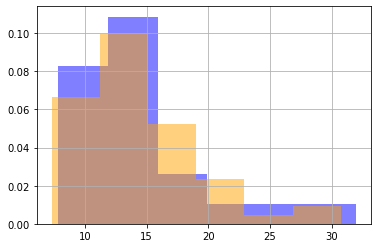

In [50]:
display((dfUTASpeeds['ok']).hist(bins=6, alpha=0.5, color='blue'  ,density=True))
display((dfUTASpeeds['pk']).hist(bins=6, alpha=0.5, color='orange',density=True))

<AxesSubplot:>

<AxesSubplot:>

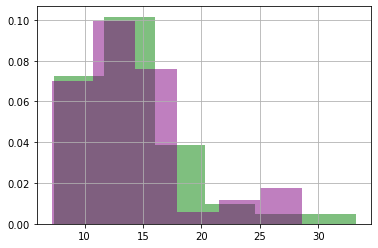

In [51]:
display((dfUTASpeeds['am peak']).hist(bins=6, alpha=0.5, color='green' ,density=True))
display((dfUTASpeeds['pm peak']).hist(bins=6, alpha=0.5, color='purple',density=True))

# TDM Speeds

In [52]:
dfTDMRoute = pd.read_csv(fnTDMRoute)
display(dfTDMRoute)

,MODE,NAMEID,NAME,OPERATOR,ONEWAY,RT_DIST,PK_PRD,OK_PRD,PK_HEADWAY,OK_HEADWAY,...,DY_ALIGHT,PK_VEH,OK_VEH,DY_VEH,PK_REVMI,OK_REVMI,DY_REVMI,PK_REVHR,OK_REVHR,DY_REVHR
0,4,1.0,D460,0,1,24.40,6,10,60,0,...,104.16,2.0,0.0,2.0,146.40,0.0,146.40,12.0,0.0,12.0
1,4,2.0,D461,0,1,38.74,6,10,30,0,...,234.71,5.0,0.0,5.0,464.88,0.0,464.88,30.0,0.0,30.0
2,4,3.0,D462,0,1,23.44,6,10,40,0,...,91.87,3.0,0.0,3.0,210.96,0.0,210.96,18.0,0.0,18.0
3,4,4.0,FD605,0,0,15.96,6,10,30,30,...,292.38,2.0,2.0,2.0,191.52,319.2,510.72,12.0,20.0,32.0
4,4,5.0,M805_Santaquin,0,1,61.66,6,10,45,60,...,553.10,3.0,2.0,3.0,493.28,616.6,1109.90,18.0,20.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,7,105.0,Green,0,0,28.66,6,10,15,15,...,17741.18,7.0,7.0,7.0,687.84,1146.4,1834.20,42.0,70.0,112.0
105,7,106.0,Red,0,0,46.48,6,10,15,15,...,24441.63,8.0,8.0,8.0,1115.50,1859.2,2974.70,48.0,80.0,128.0
106,7,107.0,Sline,0,0,4.28,6,10,15,15,...,1347.08,2.0,2.0,2.0,102.72,171.2,273.92,12.0,20.0,32.0
107,8,108.0,RCRT_OGPN,0,0,162.20,6,10,30,60,...,20478.60,9.0,5.0,9.0,1946.40,1622.0,3568.40,54.0,50.0,104.0


In [53]:
# filter by MODE 4
dfTDMRoute4 = dfTDMRoute[(dfTDMRoute['MODE']==4) | (dfTDMRoute['MODE']==5) | (dfTDMRoute['MODE']==9)]
dfTDMRoute4

,MODE,NAMEID,NAME,OPERATOR,ONEWAY,RT_DIST,PK_PRD,OK_PRD,PK_HEADWAY,OK_HEADWAY,...,DY_ALIGHT,PK_VEH,OK_VEH,DY_VEH,PK_REVMI,OK_REVMI,DY_REVMI,PK_REVHR,OK_REVHR,DY_REVHR
0,4,1.0,D460,0,1,24.40,6,10,60,0,...,104.16,2.0,0.0,2.0,146.40,0.00,146.40,12.0,0.0,12.0
1,4,2.0,D461,0,1,38.74,6,10,30,0,...,234.71,5.0,0.0,5.0,464.88,0.00,464.88,30.0,0.0,30.0
2,4,3.0,D462,0,1,23.44,6,10,40,0,...,91.87,3.0,0.0,3.0,210.96,0.00,210.96,18.0,0.0,18.0
3,4,4.0,FD605,0,0,15.96,6,10,30,30,...,292.38,2.0,2.0,2.0,191.52,319.20,510.72,12.0,20.0,32.0
4,4,5.0,M805_Santaquin,0,1,61.66,6,10,45,60,...,553.10,3.0,2.0,3.0,493.28,616.60,1109.90,18.0,20.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,4,94.0,SF578,0,0,13.90,6,10,30,30,...,107.93,2.0,2.0,2.0,166.80,278.00,444.80,12.0,20.0,32.0
94,4,95.0,SF590,0,0,11.54,6,10,45,45,...,266.68,1.0,1.0,1.0,92.32,153.87,246.19,6.0,10.0,16.0
95,4,96.0,SF94,0,0,7.22,6,10,30,30,...,190.91,1.0,1.0,1.0,86.64,144.40,231.04,6.0,10.0,16.0
96,5,97.0,BRT3500S,0,0,28.66,6,10,15,15,...,1802.03,6.0,6.0,6.0,687.84,1146.40,1834.20,36.0,60.0,96.0


In [54]:
dfTDMSpeeds = dfTDMRoute[['NAME','MODE','OK_SPEED','PK_SPEED']]

In [55]:
dfTDMSpeeds.describe()

,MODE,OK_SPEED,PK_SPEED
count,109.000000,109.000000,109.000000
mean,4.311927,19.941284,19.402752
std,0.919916,5.978685,5.609655
min,4.000000,11.800000,11.800000
25%,4.000000,16.800000,16.600000
50%,4.000000,18.400000,18.100000
75%,4.000000,20.000000,19.700000
max,9.000000,48.200000,47.200000


<AxesSubplot:>

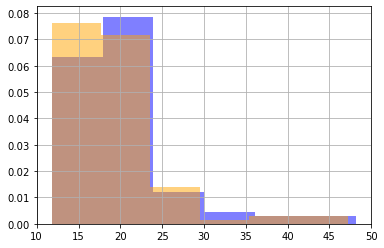

In [56]:
dfTDMSpeeds['OK_SPEED'].hist(bins=6, alpha=0.5, color='blue'  ,density=True)
dfTDMSpeeds['PK_SPEED'].hist(bins=6, alpha=0.5, color='orange',density=True)

# Compare UTA speeds and TDM Speeds

count    48.000000
mean     14.303846
std       5.301985
min       7.838376
25%      10.335011
50%      13.867916
75%      15.694762
max      31.999001
Name: ok, dtype: float64

count    109.000000
mean      19.941284
std        5.978685
min       11.800000
25%       16.800000
50%       18.400000
75%       20.000000
max       48.200000
Name: OK_SPEED, dtype: float64

Off-Peak Speed Histogram


<AxesSubplot:>

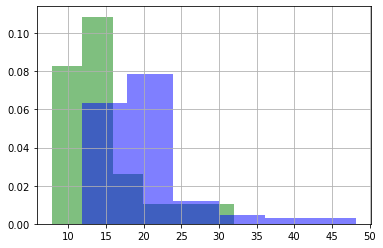

In [57]:
display(dfUTASpeeds['ok'      ].describe())
display(dfTDMSpeeds['OK_SPEED'].describe())
print("Off-Peak Speed Histogram")
dfUTASpeeds['ok'      ].hist(bins=6, alpha=0.5, color='green',density=True)
dfTDMSpeeds['OK_SPEED'].hist(bins=6, alpha=0.5, color='blue' ,density=True)

count    54.000000
mean     14.610964
std       4.846047
min       7.295948
25%      10.826471
50%      13.940959
75%      16.203593
max      30.743734
Name: pk, dtype: float64

count    109.000000
mean      19.402752
std        5.609655
min       11.800000
25%       16.600000
50%       18.100000
75%       19.700000
max       47.200000
Name: PK_SPEED, dtype: float64

Peak Speed Histogram


<AxesSubplot:>

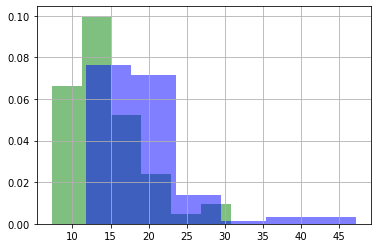

In [58]:
display(dfUTASpeeds['pk'      ].describe())
display(dfTDMSpeeds['PK_SPEED'].describe())
print("Peak Speed Histogram")
dfUTASpeeds['pk'      ].hist(bins=6, alpha=0.5, color='green',density=True)
dfTDMSpeeds['PK_SPEED'].hist(bins=6, alpha=0.5, color='blue' ,density=True)


# Compare Route-by-Route

In [59]:
dfTDMtoUTARoute = pd.read_csv(fnTDMtoUTARoute)
display(dfTDMtoUTARoute)

,TDMRoute,UTARoute,Label
0,D460,NaN,D460
1,D461,NaN,D461
2,D462,NaN,D462
3,FD605,F605,FD605
4,M805_Santaquin,805,M805_Santaquin
...,...,...,...
104,NaN,F402,F402
105,NaN,919,919
106,NaN,920,920
107,NaN,953,953


In [60]:
dfCompare = pd.DataFrame.merge(dfUTASpeeds, dfTDMtoUTARoute, left_on='ROUTE', right_on='UTARoute', how='outer')
dfCompare = pd.DataFrame.merge(dfTDMSpeeds, dfCompare      , left_on='NAME' , right_on='TDMRoute', how='outer')

dfCompare['NAME']     = dfCompare['NAME'    ].fillna('')
dfCompare['UTARoute'] = dfCompare['UTARoute'].fillna('')

dfCompare = dfCompare.dropna()

display(dfCompare[dfCompare['MODE']==4].describe())
display(dfCompare[dfCompare['MODE']==5].describe())
display(dfCompare[dfCompare['MODE']==6].describe())
display(dfCompare[dfCompare['MODE']==9].describe())

#dfCompare[dfCompare['TDMRoute']=='BRT_ProOrm']

,MODE,OK_SPEED,PK_SPEED,am peak,ok,pk,pm peak
count,38.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,4.0,18.344737,17.994737,13.932877,13.851806,13.674891,13.460884
std,0.0,4.444352,4.211885,4.749001,4.674880,4.389253,4.214131
min,4.0,13.700000,13.900000,7.397980,7.838376,7.295948,7.196692
25%,4.0,16.325000,15.875000,10.816057,10.591655,10.134823,10.181846
50%,4.0,17.900000,17.450000,13.938214,13.867916,13.617204,13.031695
75%,4.0,19.050000,18.600000,15.295934,15.049307,15.178394,15.111373
max,4.0,41.600000,40.300000,33.238810,31.999001,30.743734,28.596764


,MODE,OK_SPEED,PK_SPEED,am peak,ok,pk,pm peak
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,MODE,OK_SPEED,PK_SPEED,am peak,ok,pk,pm peak
count,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000
mean,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672
25%,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672
50%,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672
75%,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672
max,6.0,26.9,26.4,26.027939,25.475639,22.013195,19.076672


,MODE,OK_SPEED,PK_SPEED,am peak,ok,pk,pm peak
count,1.0,1.0,1.0,1.00000,1.000000,1.000000,1.000000
mean,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854
25%,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854
50%,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854
75%,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854
max,9.0,16.6,16.6,10.51693,9.984424,10.076162,9.670854


<AxesSubplot:>

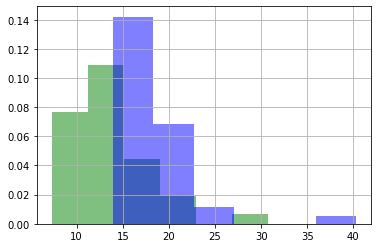

In [61]:
dfCompare['pk'      ].hist(bins=6, alpha=0.5, color='green',density=True)
dfCompare['PK_SPEED'].hist(bins=6, alpha=0.5, color='blue' ,density=True)

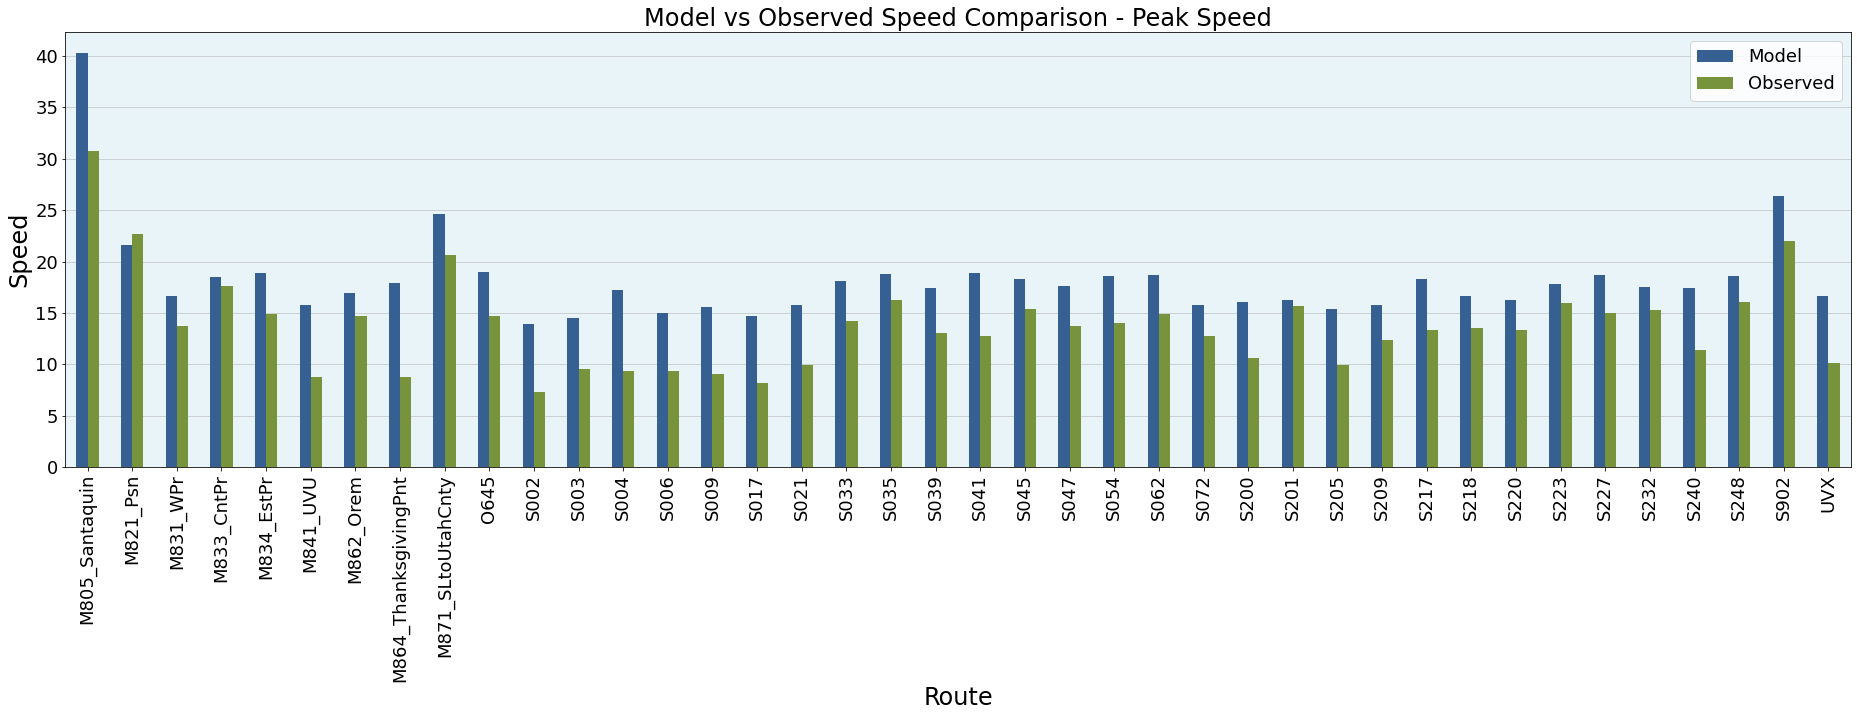

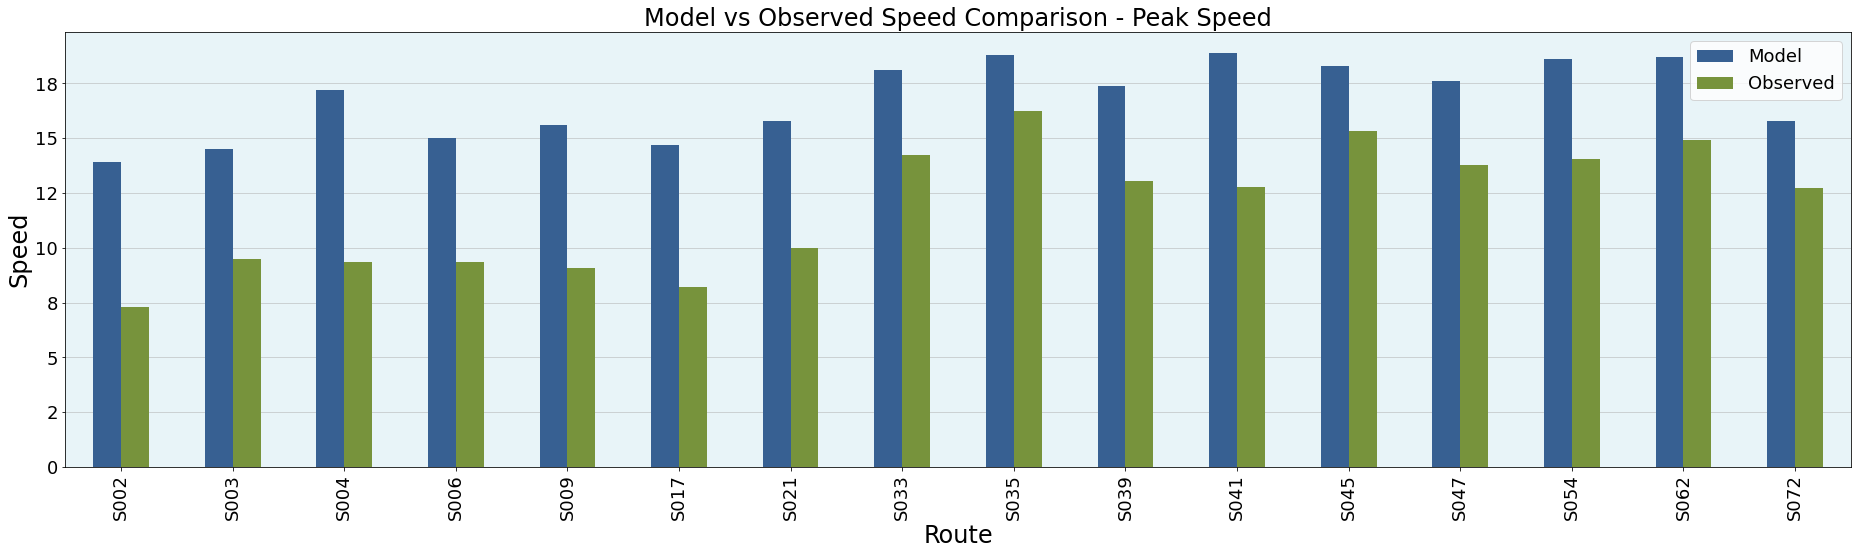

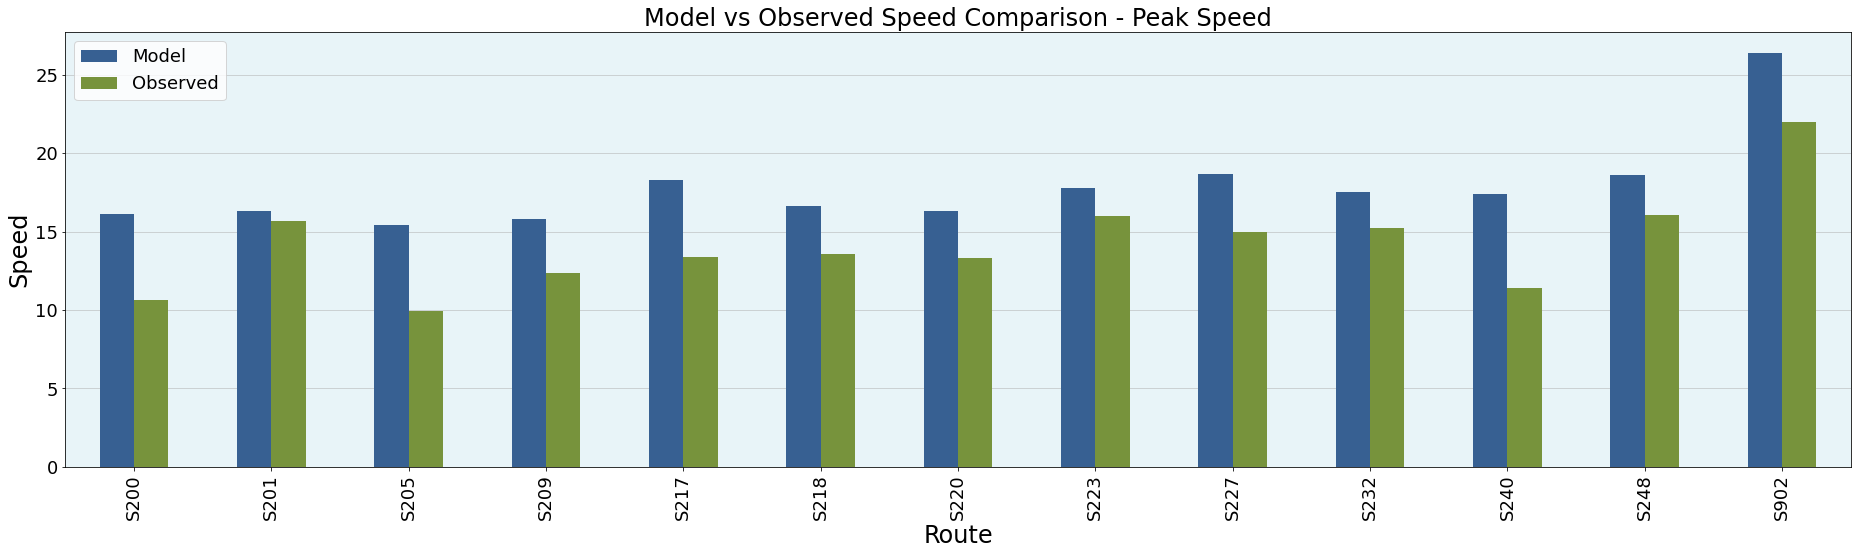

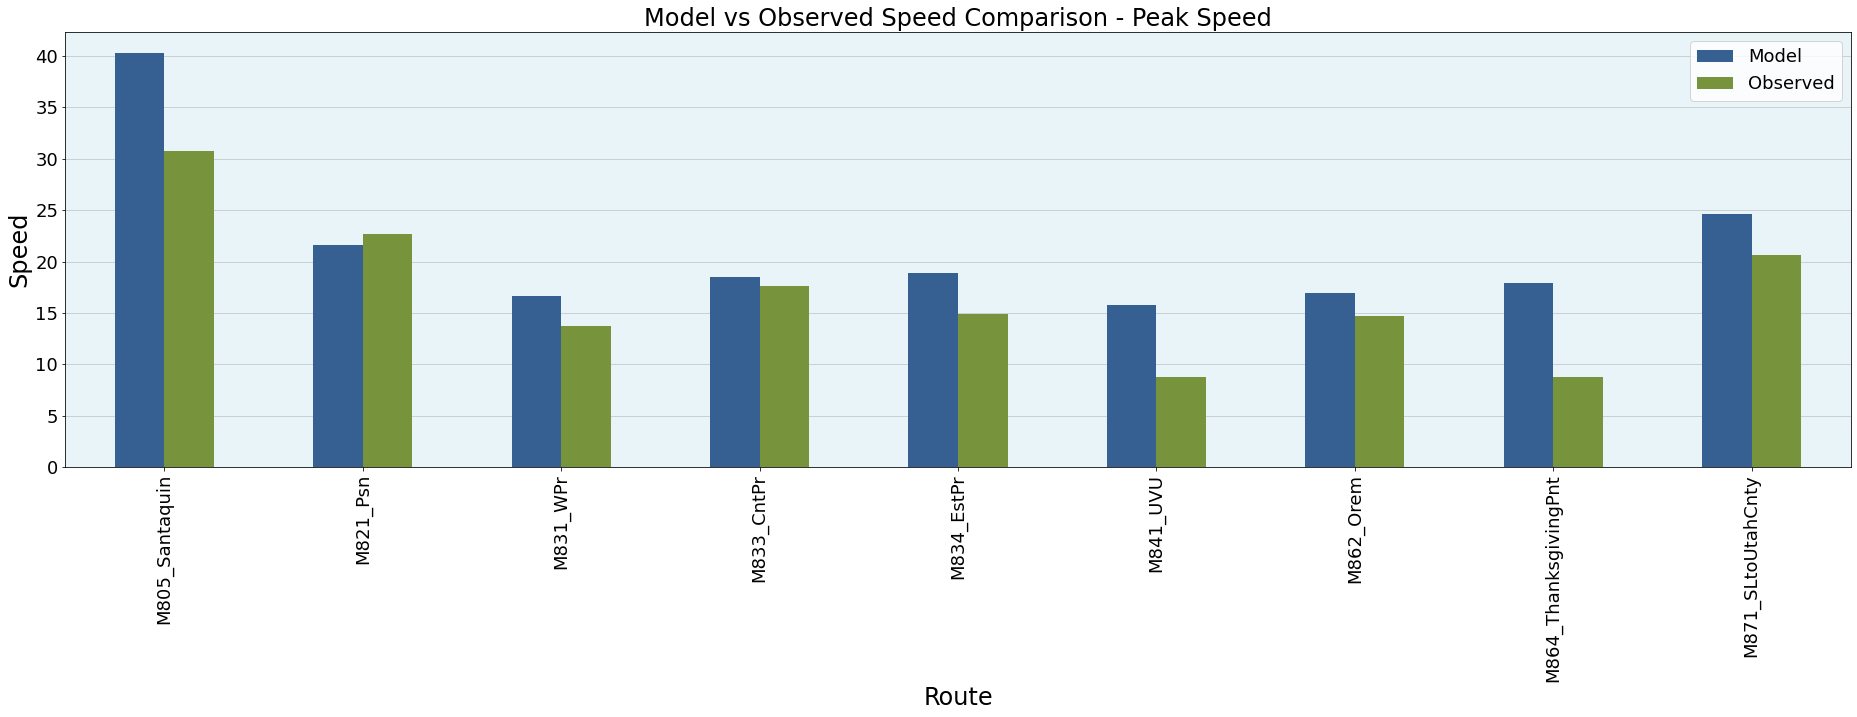

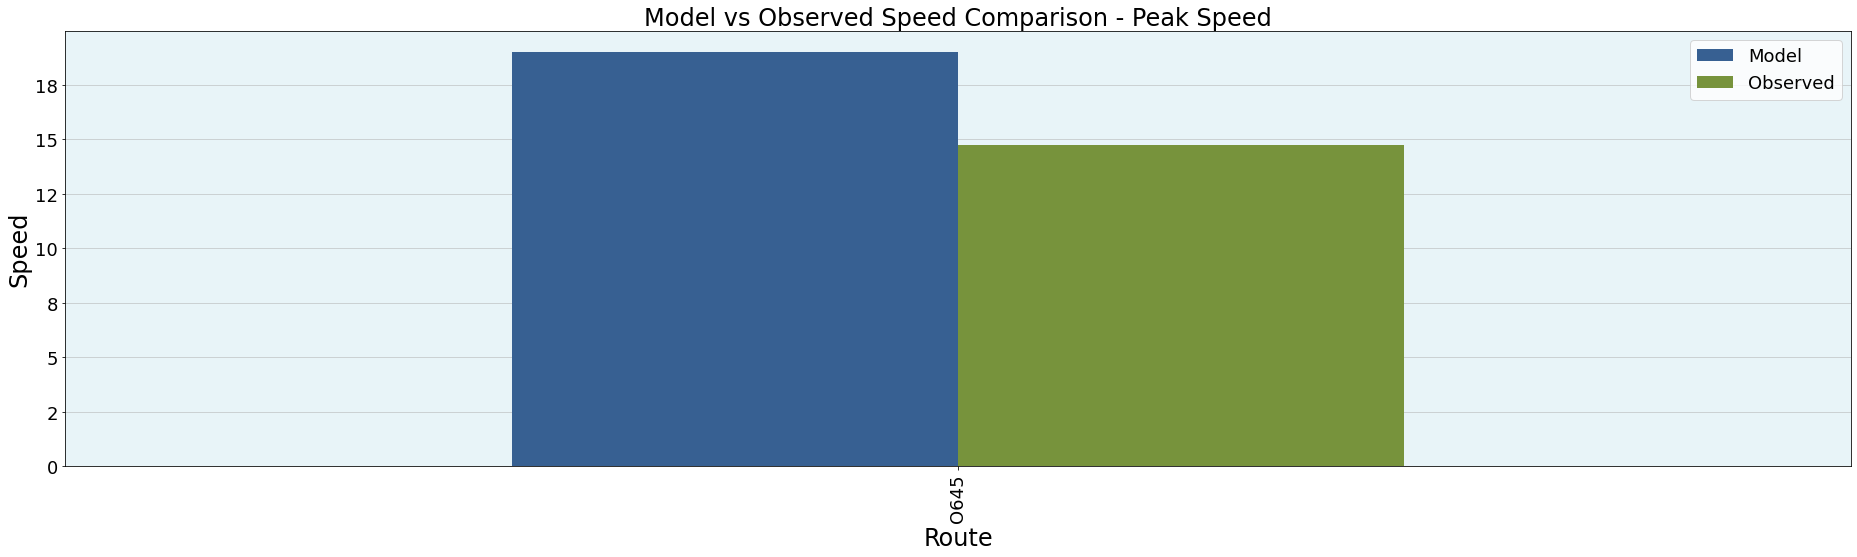

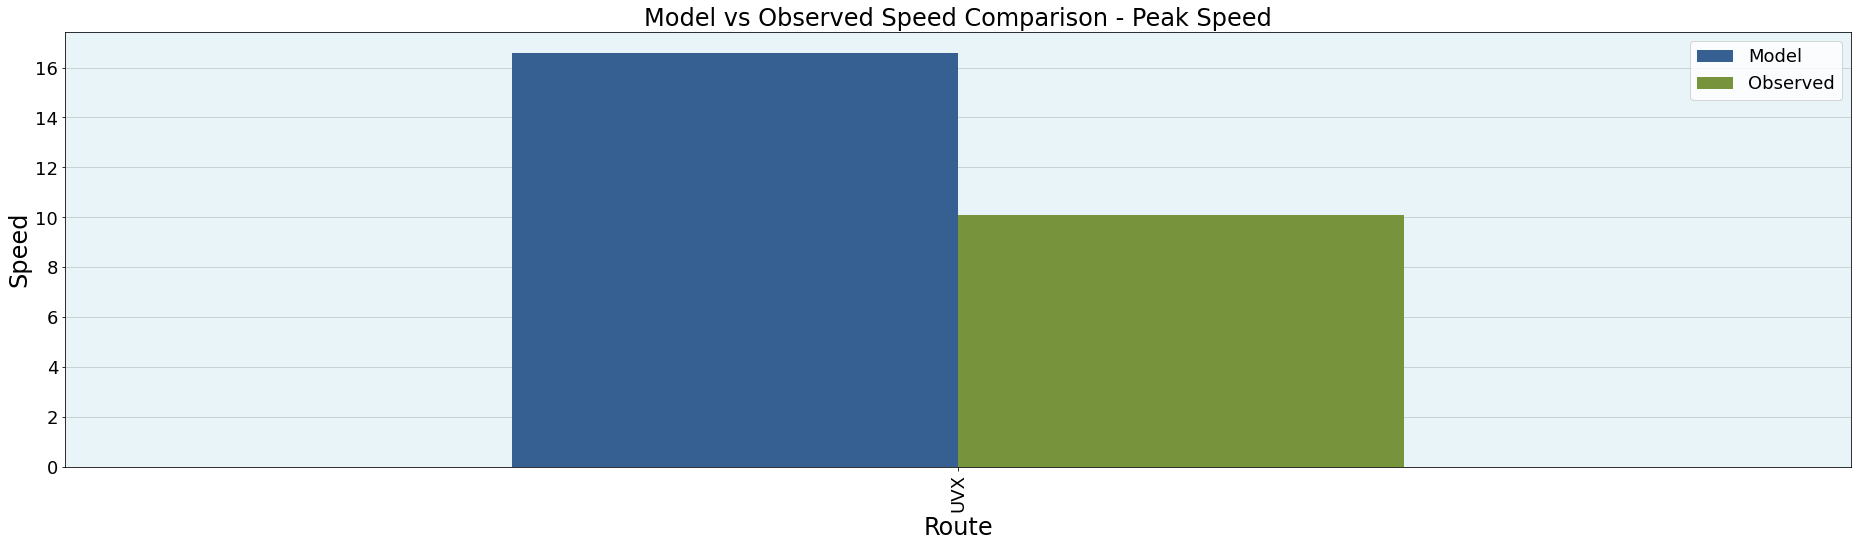

In [62]:
import matplotlib.ticker as mtick
from IPython.display import display, Markdown

sXAxisLabel    = 'Route'
sYAxisLabel    = 'Speed'
aYMax          = 30
aFigureSize    = (32,8)
iTitleSize     = 36
iLegendSize    = 18
iAxisItemSize  = 18
iAxisTitleSize = 24
sBGColor       = "#e8f4f8"
sShareBGColor  = "#e0e0e0"
sColor1        = "#376092"
sColor2        = "#77933c"

dFilters = [
                dfCompare,
                dfCompare[(dfCompare.Label.str[:2]=='S0')  ],
                dfCompare[(dfCompare.Label.str[0 ]=='S' )  & (dfCompare.Label.str[:2]!='S0') & (dfCompare.Label.str[:2]!='SF')],
#                dfCompare[ dfCompare.Label.str[:2]=='SF'   ],
                dfCompare[ dfCompare.Label.str[0 ]=='M'    ],
                dfCompare[(dfCompare.Label.str[0 ]=='O')   | (dfCompare.Label.str[0 ]=='D') ],
                dfCompare[(dfCompare.Label.str[:3]=='UVX') | (dfCompare.Label.str[:3]=='BRT')]
            ]

for f in dFilters:
    #set title
    #ax.set_title(aTitle[aGroupBy.index(gb)], fontsize=iTitleSize)
    #add title 
    #filter dataframe to plot
    #dfFilter = dfCompare[(dfCompare.Label.str[0]=='S') & (dfCompare.Label.str[:2]!='SF')]

    sTitle = 'Model vs Observed Speed Comparison - Peak Speed'
    dfPlot = f.groupby(['Label']).agg(TDMSpeed=('PK_SPEED','mean'),UTASpeed=('pk','mean'))

    ax = dfPlot.plot.bar(figsize=aFigureSize, fontsize=iAxisItemSize, color=(sColor1, sColor2), zorder=10)
    ax.legend(['Model','Observed'], prop=dict(size=iLegendSize));

    #set x,y labels
    ax.set_title(sTitle, fontsize=iAxisTitleSize)
    ax.set_xlabel(sXAxisLabel, fontsize=iAxisTitleSize)
    ax.set_ylabel(sYAxisLabel, fontsize=iAxisTitleSize)

    ax.grid('on', which='major', axis='y', linestyle='-', linewidth=0.5, zorder=1)

    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    #ax.set_ylim([0, aYMax[aGroupBy.index(gb)]])

    ax.set_facecolor (sBGColor)


In [63]:
dfCompare_ByMode = dfCompare.groupby(['MODE'],as_index=False).agg(NumRoutes=('pk','count'),PeakAvgMod=('PK_SPEED','mean'),PeakAvgObs=('pk','mean'),OffPeakAvgMod=('OK_SPEED','mean'),OffPeakAvgObs=('ok','mean'))
dfCompare_ByMode = dfCompare_ByMode.dropna()
dfCompare_ByMode['PeakDiff'   ] = dfCompare_ByMode['PeakAvgMod'   ] - dfCompare_ByMode['PeakAvgObs'   ]
dfCompare_ByMode['OffPeakDiff'] = dfCompare_ByMode['OffPeakAvgMod'] - dfCompare_ByMode['OffPeakAvgObs']
dfCompare_ByMode = dfCompare_ByMode[['MODE','NumRoutes','PeakAvgMod'         ,'PeakAvgObs'            ,'PeakDiff'       ,'OffPeakAvgMod'          ,'OffPeakAvgObs'             ,'OffPeakDiff'        ]]
z`dfCompare_ByMode.columns =           'MODE','NumRoutes','Peak AvgSpeed Model','Peak AvgSpeed Observed','Peak Difference','Off-Peak AvgSpeed Model','Off-Peak AvgSpeed Observed','Off-Peak Difference'
dfCompare_ByMode['MODE'] = dfCompare_ByMode['MODE'].astype(int)
pd.options.display.float_format = '{:,.1f}'.format
#dfCompare_ByMode = dfCompare_ByMode.set_index('MODE')
#dfCompare_ByMode = dfCompare_ByMode.style.hide_index()
display(dfCompare_ByMode)

SyntaxError: invalid syntax (<ipython-input-63-9eba4e66d136>, line 6)